# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

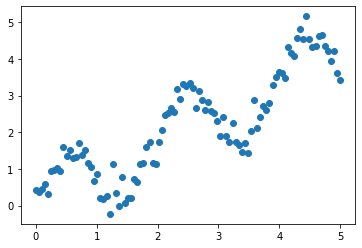

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5369339021790571


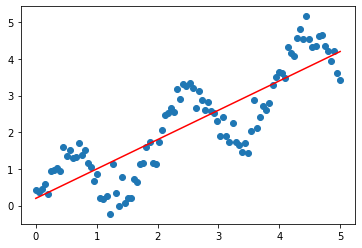

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

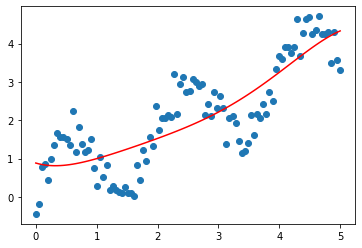

In [15]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.5396734   3.6658249  -1.77680838  0.38320703 -0.02984898]
interception:  1.1642139821115656


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.16421398, 1.04507187, 0.94329226, 0.85759003, 0.78673755,
       0.72956352, 0.68495174, 0.65183998, 0.62921879, 0.6161303 ,
       0.61166709, 0.61497097, 0.62523181, 0.6416864 , 0.66361721,
       0.69035128, 0.72125898, 0.75575289, 0.79328659, 0.83335347,
       0.8754856 , 0.91925251, 0.96426003, 1.01014912, 1.05659467,
       1.10330434, 1.1500174 , 1.19650352, 1.24256159, 1.28801858,
       1.33272835, 1.37657044, 1.41944893, 1.46129125, 1.50204702,
       1.54168683, 1.58020111, 1.61759893, 1.65390681, 1.68916758,
       1.72343917, 1.75679346, 1.78931507, 1.8211002 , 1.85225548,
       1.88289673, 1.91314786, 1.94313961, 1.97300845, 2.00289536,
       2.03294465, 2.06330282, 2.09411731, 2.12553544, 2.15770309,
       2.19076366, 2.2248568 , 2.26011725, 2.29667369, 2.33464757,
       2.37415188, 2.41529001, 2.45815458, 2.50282625, 2.54937253,
       2.59784662, 2.64828624, 2.70071243, 2.7551284 , 2.81151833,
       2.86984619, 2.9300546 , 2.9920636 , 3.05576953, 3.12104

In [14]:
regr_poly.predict(X_poly)

array([1.16421398, 1.04507187, 0.94329226, 0.85759003, 0.78673755,
       0.72956352, 0.68495174, 0.65183998, 0.62921879, 0.6161303 ,
       0.61166709, 0.61497097, 0.62523181, 0.6416864 , 0.66361721,
       0.69035128, 0.72125898, 0.75575289, 0.79328659, 0.83335347,
       0.8754856 , 0.91925251, 0.96426003, 1.01014912, 1.05659467,
       1.10330434, 1.1500174 , 1.19650352, 1.24256159, 1.28801858,
       1.33272835, 1.37657044, 1.41944893, 1.46129125, 1.50204702,
       1.54168683, 1.58020111, 1.61759893, 1.65390681, 1.68916758,
       1.72343917, 1.75679346, 1.78931507, 1.8211002 , 1.85225548,
       1.88289673, 1.91314786, 1.94313961, 1.97300845, 2.00289536,
       2.03294465, 2.06330282, 2.09411731, 2.12553544, 2.15770309,
       2.19076366, 2.2248568 , 2.26011725, 2.29667369, 2.33464757,
       2.37415188, 2.41529001, 2.45815458, 2.50282625, 2.54937253,
       2.59784662, 2.64828624, 2.70071243, 2.7551284 , 2.81151833,
       2.86984619, 2.9300546 , 2.9920636 , 3.05576953, 3.12104

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distribution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [18]:
regr_rbf = LinearRegression()

In [19]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

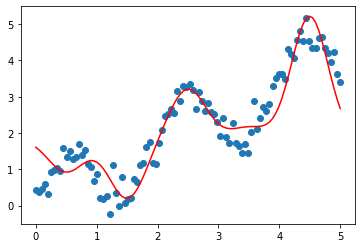

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [21]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.90463825 -1.63475994  1.38088386  0.32368553  3.38285558]
interception:  1.8332987534637484


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

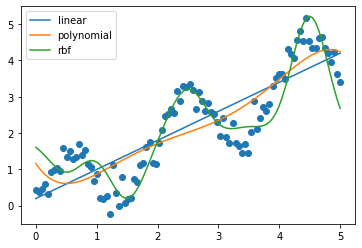

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5369339021790571


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48243205792151733


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2465874527696553
